In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from wordcloud import WordCloud

### This dataset is taken from website name gogoanime 


In [3]:
df = pd.read_csv("animedata.csv")

In [4]:
df.head()

name        Type  \
0             A Channel   TV Series   
1        A Channel Ova    TV Series   
2    A Channel Special    TV Series   
3       A Day Before Us         ONA   
4  A Disguised Princess         ONA   

                                        Plot Summary  \
0   Toeru takes a test so she can enter the same ...   
1   Toeru takes a test so she can enter the same ...   
2   Toeru takes a test so she can enter the same ...   
3   A Day Before Us is an animated Korean drama o...   
4   "Ken always disguised herself as a man. She w...   

                                               Genre Released      Status  \
0              Comedy, School, Seinen, Slice of Life   2011.0   Completed   
1              Comedy, School, Seinen, Slice of Life   2012.0   Completed   
2              Comedy, School, Seinen, Slice of Life   2011.0   Completed   
3                                            Romance   2018.0   Completed   
4   Comedy, Drama, Fantasy, Gender Bender, Histor...   2021.0   Completed   

                                 Other name  
0                                 A-Channel  
1   A-Channel+smile, Aチャンネル+smile（プラス スマイル）  
2                                 A-Channel  
3             A Day Before Us (Season Zero)  
4                                       NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          12240 non-null  object
 1   Type          12229 non-null  object
 2   Plot Summary  11736 non-null  object
 3   Genre         12086 non-null  object
 4   Released      12134 non-null  object
 5   Status        12088 non-null  object
 6   Other name    11480 non-null  object
dtypes: object(7)
memory usage: 669.5+ KB


### This data has followling data about anime
#### name of the anime
#### Type of name anime (Type of anime mean is it TV show, or ova, or spring name etc)
#### plot summary of anime
#### Genre of Anime (Genre e.g comedy, romence, adventure, etc)
####  Status of anime mean this anime is completed or continue or upcoming 
#### Other name: In anime word anime has usually anime has one japanese name and other english name . E.G Attack on Titan other name Shingeki no Kyojin
#### Released: year in which anime got released

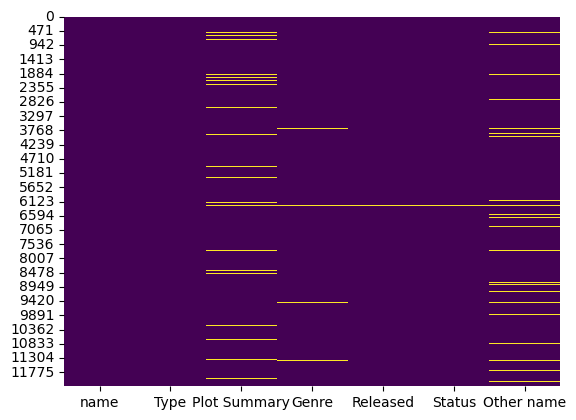

In [6]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()


## Anime are produce in japan so they original comes in japanese language so for USA anime comes in english dub so I am going to check the that 

In [7]:
def contains_dub(s):
    return "dub" in s.lower()
    

In [8]:
mask = df['name'].apply(contains_dub)

In [9]:
print(df.loc[mask, 'name'])

7                                   A Letter to Momo (Dub)
9                          A Little Snow Fairy Sugar (Dub)
12                                     A Starry Tale (Dub)
14                                   A Tree of Palme (Dub)
17                              A Wind Named Amnesia (Dub)
                               ...                        
12215                     Yuukoku no Moriarty Part 2 (Dub)
12217                           Yuusei Shounen Papii (Dub)
12220                              Yuusha ga Shinda! (Dub)
12225    Yuusha Party wo Tsuihou sareta Beast Tamer, Sa...
12233                               Yuusha, Yamemasu (Dub)
Name: name, Length: 2386, dtype: object


In [29]:
anime_in_dub = df[df['name'].str.contains('dub', case=False)]
anime_in_dub.tail(10)


name                Type  \
12179                                   Yuru Camp△ (Dub)   Winter 2018 Anime   
12195                                Yuugen Kaisha (Dub)                 OVA   
12199                 Yuuki Yuuna wa Yuusha de Aru (Dub)           TV Series   
12211                          Yuukoku no Moriarty (Dub)           TV Series   
12214                      Yuukoku no Moriarty OVA (Dub)                 OVA   
12215                   Yuukoku no Moriarty Part 2 (Dub)           TV Series   
12217                         Yuusei Shounen Papii (Dub)           TV Series   
12220                            Yuusha ga Shinda! (Dub)   Spring 2023 Anime   
12225  Yuusha Party wo Tsuihou sareta Beast Tamer, Sa...     Fall 2022 Anime   
12233                             Yuusha, Yamemasu (Dub)   Spring 2022 Anime   

                                            Plot Summary  \
12179   While the perfect getaway for most girls her ...   
12195   In a country where companies are categorized ...   
12199   What does it mean to be a hero? Yuuki Yuuna t...   
12211   During the late 19th century, Great Britain h...   
12214   A newspaper article about a vandalized painti...   
12215   Great Britain is ablaze with news of a so-cal...   
12217   Tells the story of a member of the Universal ...   
12220   Far to the north of the world lies Hell's Gat...   
12225   Beast Tamer Rein, who uses animals, was a mem...   
12233   When Demon Queen Echidna begins her invasion ...   

                                                   Genre Released      Status  \
12179                    CGDCT, Iyashikei, Slice of Life   2018.0   Completed   
12195   Action, Adventure, Comedy, Super Power, Super...   1994.0   Completed   
12199               Drama, Fantasy, Magic, Slice of Life   2014.0   Completed   
12211   Historical, Mystery, Psychological, Shounen, ...   2020.0   Completed   
12214   Historical, Mystery, Psychological, Shounen, ...   2022.0   Completed   
12215   Historical, Mystery, Psychological, Shounen, ...   2021.0   Completed   
12217                 Action, Sci-Fi, Space, Super Power   1965.0   Completed   
12220               Action, Comedy, Ecchi, Harem, Parody   2023.0     Ongoing   
12225                                    Action, Fantasy   2022.0   Completed   
12233                 Action, Adventure, Comedy, Fantasy   2022.0   Completed   

                                              Other name  
12179                             Laid-Back Camp, ゆるキャン△  
12195                          Phantom Quest Corp., 幽幻怪社  
12199                  Yuuki Yuuna is a Hero, 結城友奈は勇者である  
12211               Moriarty the Patriot Edit, 憂国のモリアーティ  
12214                                          憂国のモリアーティ  
12215           Moriarty the Patriot Season 2, 憂国のモリアーティ  
12217                             Prince Planet, 遊星少年パピイ  
12220                         The Hero Is Dead!, 勇者が死んだ！  
12225   Beast Tamer, 勇者パーティーを追放されたビーストテイマー、最強種の猫耳少女と出...  
12233             I'm Quitting Heroing, Yuuyame, 勇者、辞めます

In [11]:
anime_in_dub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2386 entries, 7 to 12233
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2386 non-null   object
 1   Type          2383 non-null   object
 2   Plot Summary  2354 non-null   object
 3   Genre         2373 non-null   object
 4   Released      2373 non-null   object
 5   Status        2373 non-null   object
 6   Other name    2256 non-null   object
dtypes: object(7)
memory usage: 149.1+ KB


## here we can see that there are 2386 anime are in dub it also mean that in this dataset this data duplicate so you need to remove this row for perfroming nlp 

In [12]:
anime_in_sub = df[~df['name'].str.contains('dub', case=False)]
anime_in_sub

name        Type  \
0                 A Channel   TV Series   
1            A Channel Ova    TV Series   
2        A Channel Special    TV Series   
3           A Day Before Us         ONA   
4      A Disguised Princess         ONA   
...                     ...         ...   
12235      Yuusha, Yamemasu         OVA   
12236              Yuushibu   TV Series   
12237          Yuushibu OVA         OVA   
12238             Yuyushiki   TV Series   
12239             Yuyushiki         OVA   

                                            Plot Summary  \
0       Toeru takes a test so she can enter the same ...   
1       Toeru takes a test so she can enter the same ...   
2       Toeru takes a test so she can enter the same ...   
3       A Day Before Us is an animated Korean drama o...   
4       "Ken always disguised herself as a man. She w...   
...                                                  ...   
12235   A two-part new animation released with both B...   
12236   Yuushibu Is The story revolves around Raul, a...   
12237   Unaired episode that was released with volume...   
12238   The manga follows the school life of three gi...   
12239                                  Yuyushiki Special   

                                                   Genre Released      Status  \
0                  Comedy, School, Seinen, Slice of Life   2011.0   Completed   
1                  Comedy, School, Seinen, Slice of Life   2012.0   Completed   
2                  Comedy, School, Seinen, Slice of Life   2011.0   Completed   
3                                                Romance   2018.0   Completed   
4       Comedy, Drama, Fantasy, Gender Bender, Histor...   2021.0   Completed   
...                                                  ...      ...         ...   
12235                 Action, Adventure, Comedy, Fantasy   2022.0   Completed   
12236                    Comedy, Ecchi, Fantasy, Romance   2013.0   Completed   
12237                             Comedy, Ecchi, Fantasy   2014.0   Completed   
12238              Comedy, School, Seinen, Slice of Life   2013.0   Completed   
12239                                             Comedy   2017.0   Completed   

                                              Other name  
0                                              A-Channel  
1                A-Channel+smile, Aチャンネル+smile（プラス スマイル）  
2                                              A-Channel  
3                          A Day Before Us (Season Zero)  
4                                                    NaN  
...                                                  ...  
12235                               I'm Quitting Heroing  
12236   Yuusha ni Narenakatta Ore wa Shibushibu Shuus...  
12237                    Yusibu OVA, Yu-sibu OVA, Yusibu  
12238                                                ゆゆ式  
12239                              ゆゆ式 OVA『困らせたり、困らされたり』  

[9854 rows x 7 columns]

### In this dataset there are anime which has more than one season so I am deleting by using drop plot summay
if some anime has same plot summary mean they are some anime diffent season

In [13]:
anime_in_sub = anime_in_sub.drop_duplicates(subset=['Plot Summary'])
anime_in_sub

name                Type  \
0                          A Channel           TV Series   
3                    A Day Before Us                 ONA   
4               A Disguised Princess                 ONA   
5      A Favorite Marriage is Coming                 ONA   
6          A Game Between You and Me                 ONA   
...                              ...                 ...   
12232               Yuusha, Yamemasu   Spring 2022 Anime   
12234               Yuusha, Yamemasu             Special   
12236                       Yuushibu           TV Series   
12238                      Yuyushiki           TV Series   
12239                      Yuyushiki                 OVA   

                                            Plot Summary  \
0       Toeru takes a test so she can enter the same ...   
3       A Day Before Us is an animated Korean drama o...   
4       "Ken always disguised herself as a man. She w...   
5                                                    NaN   
6       After being cheated on by her boyfriend, Estr...   
...                                                  ...   
12232   After saving the world, the strongest hero Le...   
12234   A two-part new animation released with both B...   
12236   Yuushibu Is The story revolves around Raul, a...   
12238   The manga follows the school life of three gi...   
12239                                  Yuyushiki Special   

                                                   Genre Released      Status  \
0                  Comedy, School, Seinen, Slice of Life   2011.0   Completed   
3                                                Romance   2018.0   Completed   
4       Comedy, Drama, Fantasy, Gender Bender, Histor...   2021.0   Completed   
5                                                Romance   2019.0   Completed   
6                             Adventure, Comedy, Romance   2021.0   Completed   
...                                                  ...      ...         ...   
12232                 Action, Adventure, Comedy, Fantasy   2022.0   Completed   
12234                 Action, Adventure, Comedy, Fantasy   2022.0   Completed   
12236                    Comedy, Ecchi, Fantasy, Romance   2013.0   Completed   
12238              Comedy, School, Seinen, Slice of Life   2013.0   Completed   
12239                                             Comedy   2017.0   Completed   

                                              Other name  
0                                              A-Channel  
3                          A Day Before Us (Season Zero)  
4                                                    NaN  
5                                                    NaN  
6                                                    NaN  
...                                                  ...  
12232                      I'm Quitting Heroing, 勇者、辞めます  
12234   Kenshū Ryokō wa Mokuteki o Miushinau na; 研修旅行...  
12236   Yuusha ni Narenakatta Ore wa Shibushibu Shuus...  
12238                                                ゆゆ式  
12239                              ゆゆ式 OVA『困らせたり、困らされたり』  

[8286 rows x 7 columns]

In [14]:
anime_in_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8286 entries, 0 to 12239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8286 non-null   object
 1   Type          8285 non-null   object
 2   Plot Summary  8285 non-null   object
 3   Genre         8224 non-null   object
 4   Released      8247 non-null   object
 5   Status        8228 non-null   object
 6   Other name    7878 non-null   object
dtypes: object(7)
memory usage: 517.9+ KB


In [15]:
anime_in_sub.describe()

name        Type  \
count        8286        8285   
unique       6877          64   
top     Lupin III   TV Series   
freq           46        2733   

                                             Plot Summary    Genre Released  \
count                                                8285     8224     8247   
unique                                               8285     3029      212   
top      Toeru takes a test so she can enter the same ...   Comedy     2021   
freq                                                    1      207      192   

            Status  Other name  
count         8228        7878  
unique           3        7161  
top      Completed   Lupin III  
freq          7672          29

# let's check In which year more anime got released 

In [16]:
released = anime_in_sub["Released"]

# convert the "Released" column to a datetime format
released = pd.to_datetime(released, errors='coerce')

# extract the year from the datetime format and store it in a new column
anime_in_sub["year"] = released.dt.year


/tmp/ipykernel_5866/2518784324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_in_sub["year"] = released.dt.year


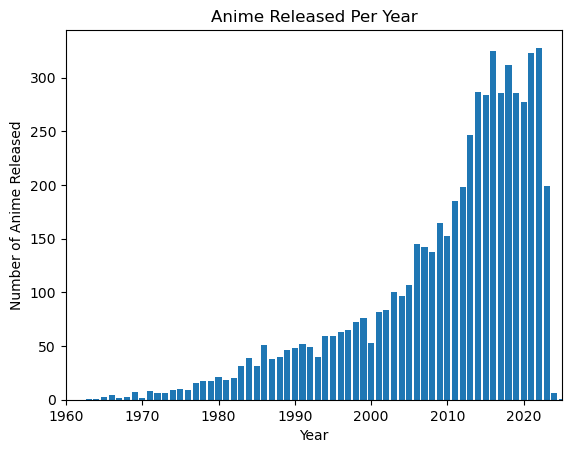

In [17]:
anime_per_year = anime_in_sub.groupby("year")["name"].count()
plt.bar(anime_per_year.index, anime_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Anime Released")
plt.title("Anime Released Per Year")
plt.xlim(1960, 2025)
plt.show()


### we can see that in recent year more anime got released 
#### If you are anime fan you know nows days we have alot of anime content

# Here I am going to plot status and wants to check how much anime are comleted


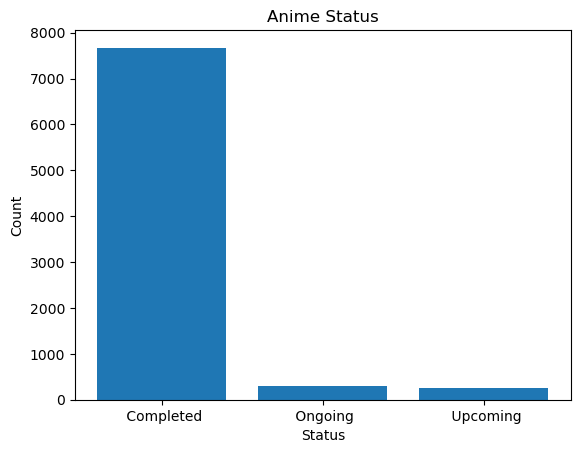

In [18]:
# group the data by "Status" column and count the number of animes in each group
status_counts = anime_in_sub.groupby('Status').size()

# create a bar chart of the status counts
plt.bar(status_counts.index, status_counts.values)

# set the chart title and axis labels
plt.title('Anime Status')
plt.xlabel('Status')
plt.ylabel('Count')

# display the chart
plt.show()

In [19]:
# for num in range(len(anime_in_sub['Genre'])):
genre = []
list_of_genre = anime_in_sub['Genre'].tolist()
for num in range(len(list_of_genre)):
    a = str(list_of_genre[num]).split(",")
#     print(list_of_genre)
# print(a)
    for x in range(len(a)):
        genre.append(a[x])

print(genre)

[' Comedy', ' School', ' Seinen', ' Slice of Life', ' Romance', ' Comedy', ' Drama', ' Fantasy', ' Gender Bender', ' Historical', ' Shoujo', ' Romance', ' Adventure', ' Comedy', ' Romance', ' Comedy', ' Fantasy', ' Action', ' Adventure', ' Comedy', ' Ecchi', ' Harem', ' Martial Arts', ' Shounen', ' Comedy', ' Drama', ' Action', ' Dementia', ' Drama', ' Sci-Fi', ' Comedy', ' School', ' Seinen', ' Slice of Life', ' Music', ' Romance', ' School', ' Shoujo', ' Action', ' Mecha', ' Sci-Fi', ' Action', ' Sci-Fi', ' Action', ' Sci-Fi', ' Sci-Fi', ' Drama', ' Slice of Life', ' Martial Arts', ' Seinen', ' Sports', ' Comedy', ' Magic', ' Romance', ' Seinen', ' Supernatural', ' Comedy', ' Harem', ' Romance', ' Seinen', ' Supernatural', ' Comedy', ' Magic', ' Supernatural', ' Action', ' Comedy', ' Seinen', ' Sports', ' Comedy', ' Romance', ' Comedy', ' Ecchi', ' Fantasy', ' Parody', ' Action', ' Ecchi', ' Harem', ' Romance', ' School', ' Supernatural', ' Action', ' Comedy', ' Ecchi', ' Drama', ' P

In [20]:
genre = [x for x in genre if x != 'nan']
# print(my_list)  # ['apple', 'cherry', 'date']
for num in range(len(genre)):
    if genre[num] == "nan":
        print(num)

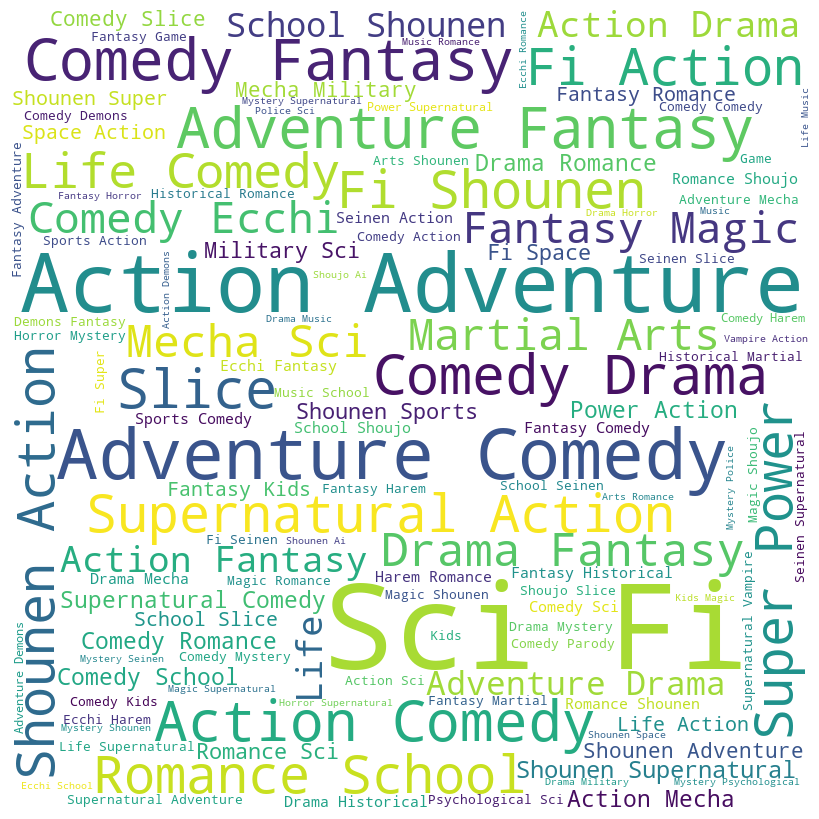

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# assume you have a list of genres
# genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

# create a string with all the genres separated by a space
genres_text = ' '.join(genre)

# create the WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(genres_text)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
  
plt.show()


In [22]:
genre

[' Comedy',
 ' School',
 ' Seinen',
 ' Slice of Life',
 ' Romance',
 ' Comedy',
 ' Drama',
 ' Fantasy',
 ' Gender Bender',
 ' Historical',
 ' Shoujo',
 ' Romance',
 ' Adventure',
 ' Comedy',
 ' Romance',
 ' Comedy',
 ' Fantasy',
 ' Action',
 ' Adventure',
 ' Comedy',
 ' Ecchi',
 ' Harem',
 ' Martial Arts',
 ' Shounen',
 ' Comedy',
 ' Drama',
 ' Action',
 ' Dementia',
 ' Drama',
 ' Sci-Fi',
 ' Comedy',
 ' School',
 ' Seinen',
 ' Slice of Life',
 ' Music',
 ' Romance',
 ' School',
 ' Shoujo',
 ' Action',
 ' Mecha',
 ' Sci-Fi',
 ' Action',
 ' Sci-Fi',
 ' Action',
 ' Sci-Fi',
 ' Sci-Fi',
 ' Drama',
 ' Slice of Life',
 ' Martial Arts',
 ' Seinen',
 ' Sports',
 ' Comedy',
 ' Magic',
 ' Romance',
 ' Seinen',
 ' Supernatural',
 ' Comedy',
 ' Harem',
 ' Romance',
 ' Seinen',
 ' Supernatural',
 ' Comedy',
 ' Magic',
 ' Supernatural',
 ' Action',
 ' Comedy',
 ' Seinen',
 ' Sports',
 ' Comedy',
 ' Romance',
 ' Comedy',
 ' Ecchi',
 ' Fantasy',
 ' Parody',
 ' Action',
 ' Ecchi',
 ' Harem',
 ' Romanc

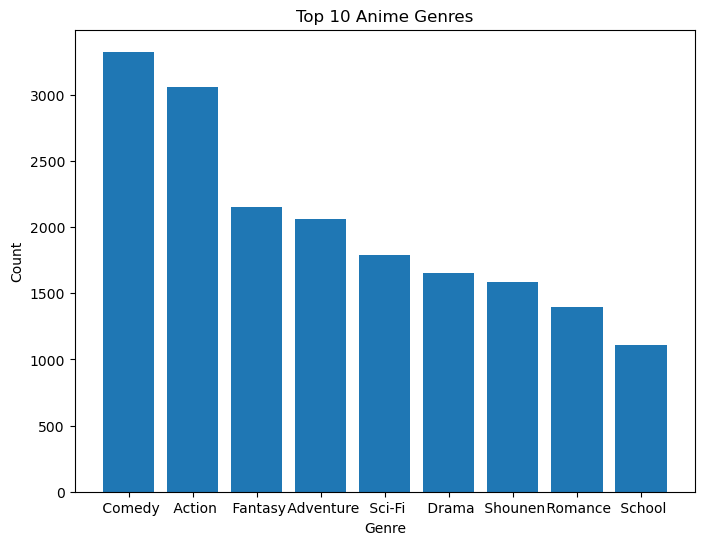

In [23]:
from collections import Counter
genre_series = pd.Series(genre)

# count frequency of each genre
genre_counts = genre_series.value_counts()

# sort in descending order
sorted_counts = genre_counts.sort_values(ascending=False)

# take top 10
top10_counts = sorted_counts.head(9)

# plot as bar chart
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(top10_counts.index, top10_counts.values)
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show(fig)

<BarContainer object of 68 artists>

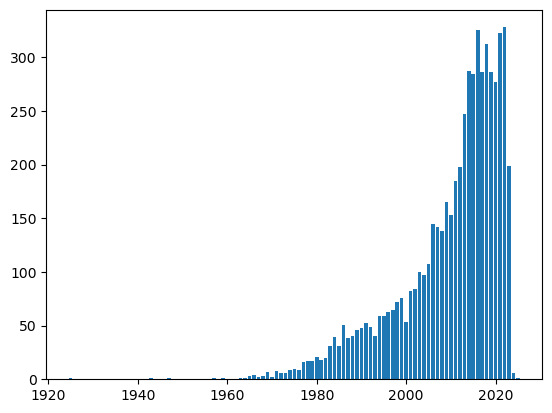

In [24]:
plt.bar(anime_per_year.index, anime_per_year.values)

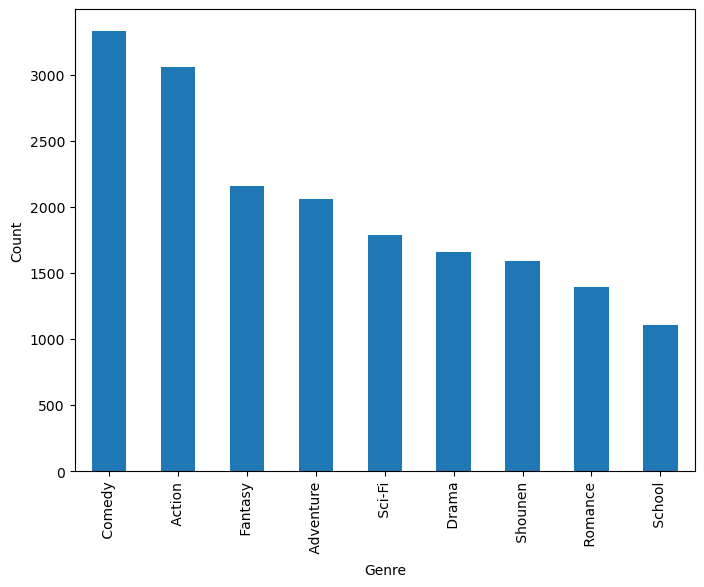

In [25]:
genre_series = pd.Series(genre)

# count frequency of each genre
genre_counts = genre_series.value_counts()

# sort in descending order
sorted_counts = genre_counts.sort_values(ascending=False)

# take top 10
top10_counts = sorted_counts.head(9)

# plot as bar chart
fig , ax= plt.subplots(figsize=(8, 6))
top10_counts.plot.bar(ax = ax)
# plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

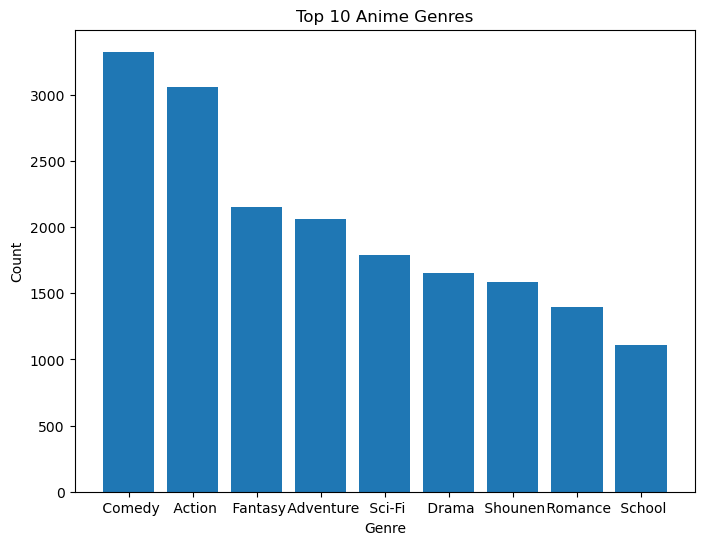

In [26]:
from collections import Counter
genre_series = pd.Series(genre)

# count frequency of each genre
genre_counts = genre_series.value_counts()

# sort in descending order
sorted_counts = genre_counts.sort_values(ascending=False)

# take top 10
top10_counts = sorted_counts.head(9)

# plot as bar chart
fig= plt.subplots(figsize=(8, 6))
plt.bar(top10_counts.index, top10_counts.values)
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show(fig)

In [27]:
genre_series = pd.Series(genre)
genre_counts = genre_series.value_counts()
genre_counts.sort_values(ascending=False)[:10] # Get top 10 genres
plt.barh(top_genres.index, top_genres.values)
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


NameError: name 'top_genres' is not defined

In [40]:
genre_series = pd.Series(genre)
genre_counts = genre_series.value_counts()
genre_counts.sort_values(ascending=False)[:10]

 Comedy          3327
 Action          3057
 Fantasy         2155
 Adventure       2062
 Sci-Fi          1787
 Drama           1656
 Shounen         1589
 Romance         1398
 School          1109
 Supernatural    1048
dtype: int64

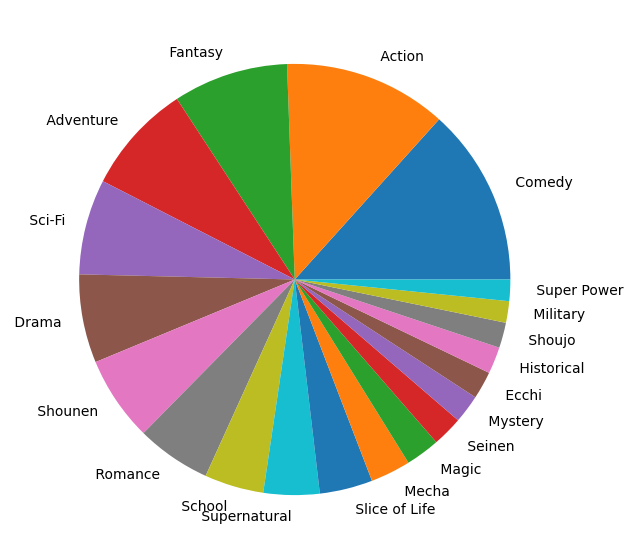

In [54]:
from collections import Counter
genre_series = pd.Series(genre)

# count frequency of each genre
genre_counts = genre_series.value_counts()

# sort in descending order
sorted_counts = genre_counts.sort_values(ascending=False)

# take top 10
top10_counts = sorted_counts.head(20)

# plot as bar chart
# fig, ax = plt.subplots(figsize=(8, 6))
fig = plt.figure(figsize =(10, 7))
plt.pie(top10_counts.values, labels = top10_counts.index )
# show plot
plt.show()

In [55]:
import plotly.graph_objs as go
genre_series = pd.Series(genre)

# count frequency of each genre
genre_counts = genre_series.value_counts()

# Assuming you have a Pandas Series called 'genre_counts'
top_genres = genre_counts.sort_values(ascending=False)[:10] # Get top 10 genres

fig = go.Figure(data=[go.Bar(
            x=top_genres.values,
            y=top_genres.index,
            orientation='h'
)])

fig.update_layout(title="Top 10 Genres",
                  xaxis_title="Count",
                  yaxis_title="Genre")

fig.show()


In [56]:
def wordC(anime_in_sub):
    genre = []
    list_of_genre = anime_in_sub['Genre'].tolist()
    for num in range(len(list_of_genre)):
        a = str(list_of_genre[num]).split(",")
    #     print(list_of_genre)
    # print(a)
        for x in range(len(a)):
            genre.append(a[x])
    genre = [x for x in genre if x != 'nan']
    genres_text = ' '.join(genre)
    return genres_text

In [57]:
genres_text = wordC(anime_in_sub=anime_in_sub)

genre_series = pd.Series(genres_text)
# count frequency of each genre
genre_counts = genre_series.value_counts()

# Assuming you have a Pandas Series called 'genre_counts'
top_genres = genre_counts.sort_values(ascending=False)[:10] # Get top 10 genres

fig = go.Figure(data=[go.Bar(
            x=top_genres.values,
            y=top_genres.index,
            orientation='h'
)])

fig.update_layout(title="Top 10 Genres",
                  xaxis_title="Count",
                  yaxis_title="Genre")
fig.show()
